# Analytis and Reporting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [5]:
# load the cleaned dataset
df =pd.read_csv("cleaned_hotel_booking.csv")
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])


### Revenue Calculation

In [9]:
df["total_nights"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
df["revenue"] = df["adr"] * df["total_nights"] # adr = average daily rate

## 1. Revenue trend over time

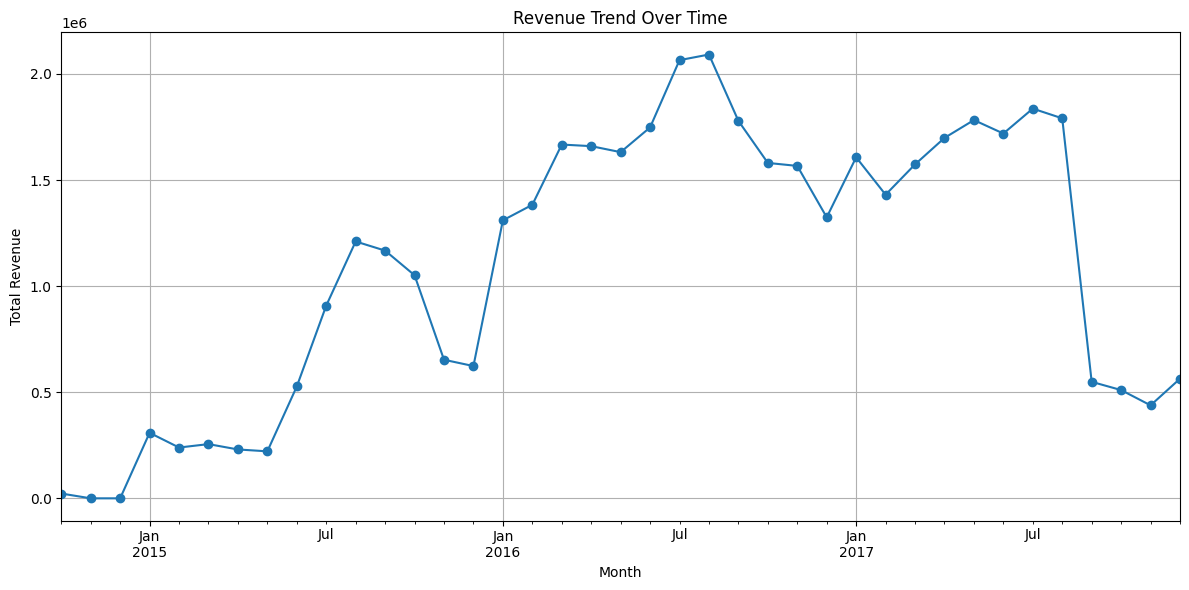

In [11]:
monthly_revenue = df.groupby(pd.Grouper(key="reservation_status_date", freq="ME"))["revenue"].sum() #ME = Month End
plt.figure(figsize=(12,6))
monthly_revenue.plot(marker="o")
plt.title("Revenue Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Cancellation rate as percentage of total bookings

Cancellation Rate Percentage is 37.04%


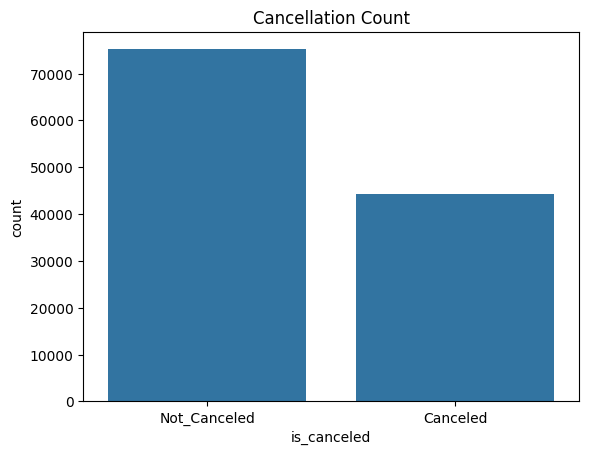

In [17]:
cancellation_rate = df["is_canceled"].mean()*100
print(f"Cancellation Rate Percentage is {cancellation_rate:.2f}%")
sns.countplot(x="is_canceled", data=df)
plt.title("Cancellation Count")
plt.xticks([0,1],["Not_Canceled", "Canceled"])
plt.show()

## 3. Geographical Distribution Of Users Doing the Bookings

In [22]:
top_countries = df["country"].value_counts().head(20)
top_countries

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
Name: count, dtype: int64

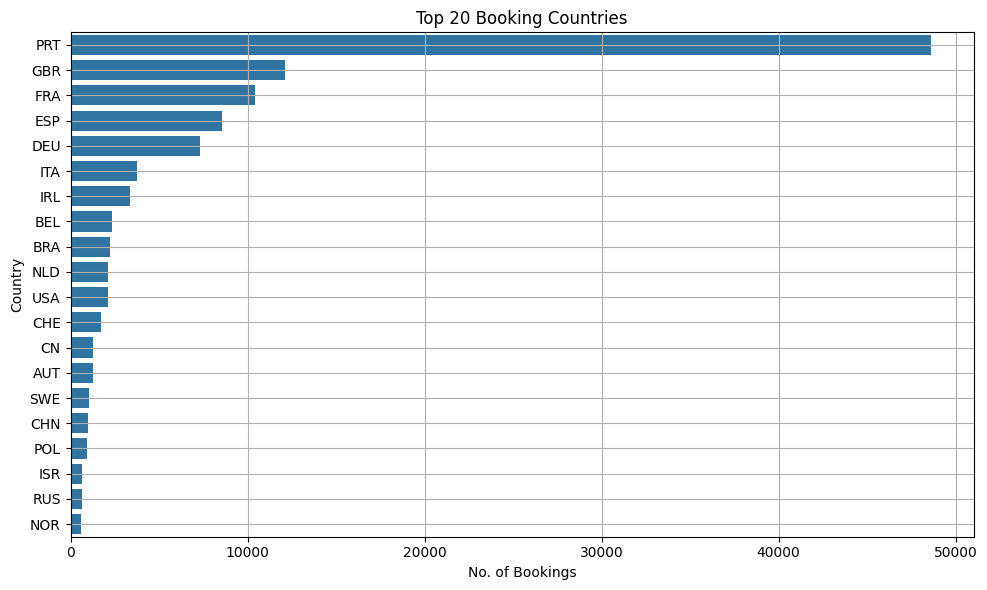

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 20 Booking Countries")
plt.xlabel("No. of Bookings")
plt.ylabel("Country")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Booking Leading Time Distribution

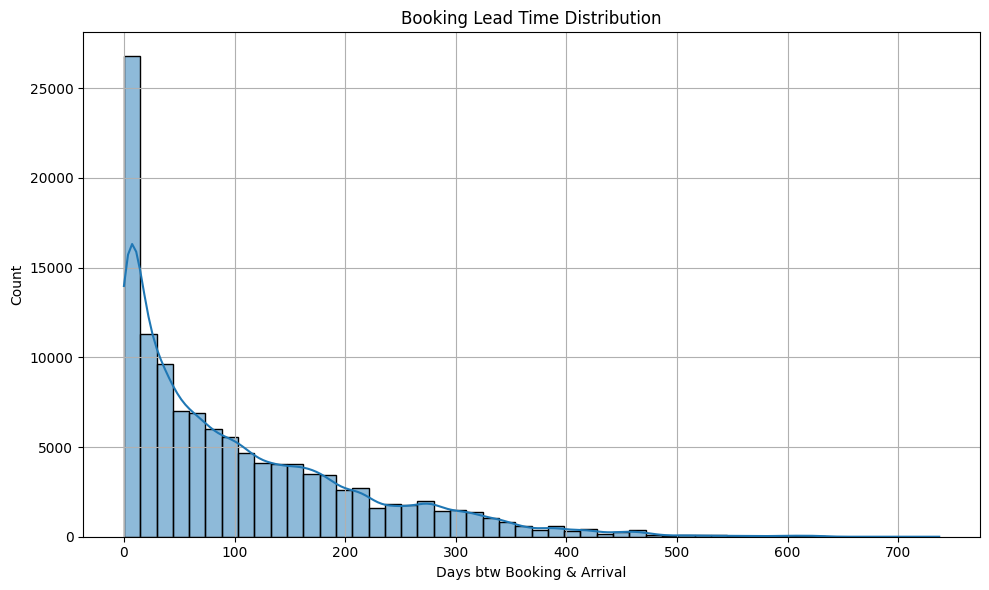

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df["lead_time"], bins=50, kde=True)
plt.title("Booking Lead Time Distribution")
plt.xlabel("Days btw Booking & Arrival")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Average Nights Per Hotel

In [30]:
avg_nights = df.groupby("hotel")["total_nights"].mean()
print(f"Average nights per {avg_nights}")

Average nights per hotel
city hotel      2.978142
resort hotel    4.318547
Name: total_nights, dtype: float64


## Exporting

In [ ]:
summary = {"cancellation_rate_percent" : round(cancellation_rate,2),
           "total_revenue" : round(df["revenue"].sum(),2),
           "top_20_countries_by_bookings" : df["country"].value_counts().head(20).to_dict(),
           "average_lead_time" : round(df["lead_time"].mean(),2),
           "average_nights_per_hotel" : avg_nights.to_dict()
           }
# Analytics saved as json file
with open("analytics_summary.json",'w') as f: json.dump(summary,f)
# Save the dataset
df.to_csv("cleaned_hotel_booking.csv", index=False)